In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'Mar' : {
        'vmin' : 160, 
        'vmax' : 1800},
    'Sep' : {
        'vmin' : 18, 
        'vmax' : 180},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}


regions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    }
}

reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
## Function to crop the dataset

def Crops(coord, d_set, dictionary):
    lon1, lon2 = dictionary[coord]['lon']
    lat1, lat2 = dictionary[coord]['lat']
    name_fig = dictionary[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))



In [21]:
c_armor1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'


fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'
fl_n3 = 'ISAS15_DM_2002_2015_MLDS_0.03.nc'
fl_n4 = 'ISAS15_DM_2002_2015_MLDS_0.015.nc'
fl_n5 = 'ISAS15_DM_2002_2015_MLDS_0.046.nc'

armor = xr.open_mfdataset(dir_1 + fl_n1)
isas1 = xr.open_dataset(dir_2 + fl_n2, autoclose=True)
isas2 = xr.open_dataset(dir_2 + fl_n3, autoclose=True)
isas3 = xr.open_dataset(dir_2 + fl_n4, autoclose=True)
isas4 = xr.open_dataset(dir_2 + fl_n5, autoclose=True)

/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  # This is added back by InteractiveShellApp.init_path()
/venv/py3-phyocean/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.p

In [19]:
armor

<xarray.Dataset>
Dimensions:    (depth: 33, latitude: 300, longitude: 560, time: 730)
Coordinates:
  * longitude  (longitude) float32 -89.875 -89.625 -89.375 ... 49.625 49.875
  * depth      (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 10.125 10.375 10.625 ... 84.375 84.625 84.875
  * time       (time) datetime64[ns] 2005-01-05 2005-01-12 ... 2018-12-26
Data variables:
    mlotst     (time, latitude, longitude) float32 dask.array<chunksize=(52, 300, 560), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(52, 33, 300, 560), meta=np.ndarray>
    to         (time, depth, latitude, longitude) float32 dask.array<chunksize=(52, 33, 300, 560), meta=np.ndarray>
    ugo        (time, depth, latitude, longitude) float32 dask.array<chunksize=(52, 33, 300, 560), meta=np.ndarray>
    vgo        (time, depth, latitude, longitude) float32 dask.array<chunksize=(52, 33, 300, 560), meta=np.ndarray>
    zo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(52, 33, 300, 560), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.0
    history:      Mon Mar  9 15:25:32 2020: ncks -d latitude,10.,85. -d longi...
    institution:  CLS
    description:  ARMOR3D REP CMEMS - April 2019 Release
    title:        ARMOR3D REP - TSHUVMld Global Ocean Observation-based Product
    domain_name:  GLO
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...
    NCO:          4.7.2

In [22]:
isas1

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 545, longitude: 720, time: 120)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 -77.010475 -76.89761 ... 89.69298 89.89626
  * depth      (depth) float32 1.0
  * time       (time) datetime64[ns] 2006-01-15 2006-02-15 ... 2015-12-15
Data variables:
    MLDP       (time, depth, latitude, longitude) float32 ...
    ML_TEMP    (time, depth, latitude, longitude) float32 ...
    ML_PSAL    (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:            CF-1.4
    title:                  Monthly analysis
    history:                20180917T095939L : Creation
    institution:            LOPS-SNO-Argo
    project_name:           ISAS-LOPS
    analysis_name:          ISAS15_DM_
    data_manager:           Nicolas Kolodziejczyk
    software_version:       expl_2dhor_mlayer - 7
    southernmost_latitude:  -77.0105
    northernmost_latitude:  89.8963
    latitude_resolution:    0.49999365
    westernmost_longitude:  -180
    easternmost_longitude:  179.5
    longitude_resolution:   0.5
    start_date:             2006-01-15
    stop_date:              2015-12-15
    creation_date:          20180917T095939L
    reference_date:         1950-01-01T00:00:00Z
    references:             Gaillard et al., JCLIM 2016, Doi:10.1175/JCLI-D-1...
    comment:                Mixed layer depths, crit= SIG0 ,zstart= 10, delta...

/venv/py3-phyocean/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


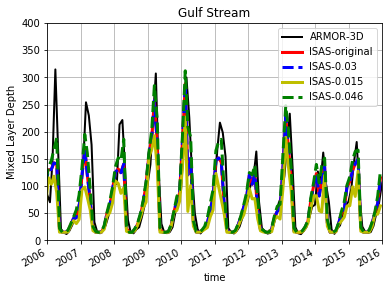

In [39]:
coord = 'gul'
gulf_a = Crops(coord, armor, regions)
gulf_i1 = Crops(coord, isas1, regions)
gulf_i2 = Crops(coord, isas2, regions)
gulf_i3 = Crops(coord, isas3, regions)
gulf_i4 = Crops(coord, isas4, regions)

lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

m_a = gulf_a.mean(('longitude', 'latitude'))
mld_ga = m_a.mlotst.resample(time='1M').mean('time')

mld_gi1 = gulf_i1.MLDP.mean(('longitude', 'latitude'))
mld_gi2 = gulf_i2.MLDP.mean(('longitude', 'latitude'))
mld_gi3 = gulf_i3.MLDP.mean(('longitude', 'latitude'))
mld_gi4 = gulf_i4.MLDP.mean(('longitude', 'latitude'))


mld_ga.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
mld_gi1[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
mld_gi2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
mld_gi3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
mld_gi4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('01-01-2006', '01-01-2016')
plt.ylim(0, 400)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper right')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
#plt.savefig(name_fig, bbox_inches='tight')


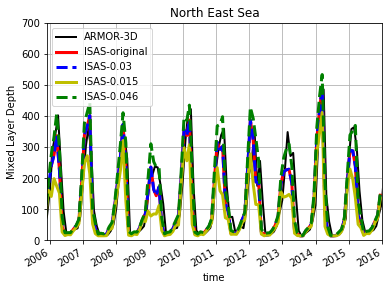

<Figure size 432x288 with 0 Axes>

In [42]:
coord = 'noe'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

north_a = Crops(coord, armor, regions)
north_i1 = Crops(coord, isas1, regions)
north_i2 = Crops(coord, isas2, regions)
north_i3 = Crops(coord, isas3, regions)
north_i4 = Crops(coord, isas4, regions)

m_na = north_a.mean(('longitude', 'latitude'))
mld_na = m_na.mlotst.resample(time='1M').mean('time')

mld_ni1 = north_i1.MLDP.mean(('longitude', 'latitude'))
mld_ni2 = north_i2.MLDP.mean(('longitude', 'latitude'))
mld_ni3 = north_i3.MLDP.mean(('longitude', 'latitude'))
mld_ni4 = north_i4.MLDP.mean(('longitude', 'latitude'))


mld_na.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
mld_ni1[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
mld_ni2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
mld_ni3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
mld_ni4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 700)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')

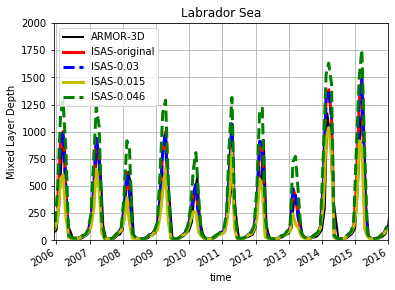

<Figure size 432x288 with 0 Axes>

In [43]:
coord = 'lab'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

lab_a = Crops(coord, armor, regions)
lab_i1 = Crops(coord, isas1, regions)
lab_i2 = Crops(coord, isas2, regions)
lab_i3 = Crops(coord, isas3, regions)
lab_i4 = Crops(coord, isas4, regions)

m_la = lab_a.mean(('longitude', 'latitude'))
mld_la = m_la.mlotst.resample(time='1M').mean('time')

mld_li1 = lab_i1.MLDP.mean(('longitude', 'latitude'))
mld_li2 = lab_i2.MLDP.mean(('longitude', 'latitude'))
mld_li3 = lab_i3.MLDP.mean(('longitude', 'latitude'))
mld_li4 = lab_i4.MLDP.mean(('longitude', 'latitude'))


mld_la.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
mld_li1[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
mld_li2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
mld_li3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
mld_li4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 2000)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')

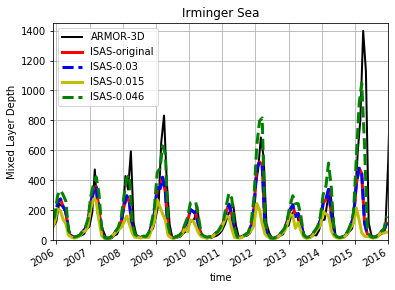

<Figure size 432x288 with 0 Axes>

In [44]:
coord = 'irm'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

irm_a = Crops(coord, armor, regions)
irm_i1 = Crops(coord, isas1, regions)
irm_i2 = Crops(coord, isas2, regions)
irm_i3 = Crops(coord, isas3, regions)
irm_i4 = Crops(coord, isas4, regions)

m_ia = irm_a.mean(('longitude', 'latitude'))
mld_ia = m_ia.mlotst.resample(time='1M').mean('time')

mld_ii1 = irm_i1.MLDP.mean(('longitude', 'latitude'))
mld_ii2 = irm_i2.MLDP.mean(('longitude', 'latitude'))
mld_ii3 = irm_i3.MLDP.mean(('longitude', 'latitude'))
mld_ii4 = irm_i4.MLDP.mean(('longitude', 'latitude'))


mld_ia.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
mld_ii1[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
mld_ii2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
mld_ii3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
mld_ii4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 1450)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')